### Iris End to End Project

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Read the Dataset

In [2]:
import pandas as pd
df =pd. read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Step 2 - Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

Step 3 - Separate X and Y(species))

In [6]:
x = df.drop(columns=["species"])
y=df[["species"]]

In [7]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [10]:
y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Step 4- Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.33, random_state=42)

In [12]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [13]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [14]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [15]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [16]:
xtrain.shape

(100, 4)

In [18]:
xtest.shape

(50, 4)

##### Step 5  - Crate a pipeline with model

In [19]:
x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [21]:
model = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    LogisticRegression()
)

In [22]:
model.fit(xtrain,ytrain)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [24]:
ypred_train = model.predict(xtrain)
ypred_train[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [25]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [26]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [28]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


#### Step 6 - Evaluate model

In [29]:
model.score(xtrain,ytrain)

0.96

In [30]:
model.score(xtest,ytest)

0.98

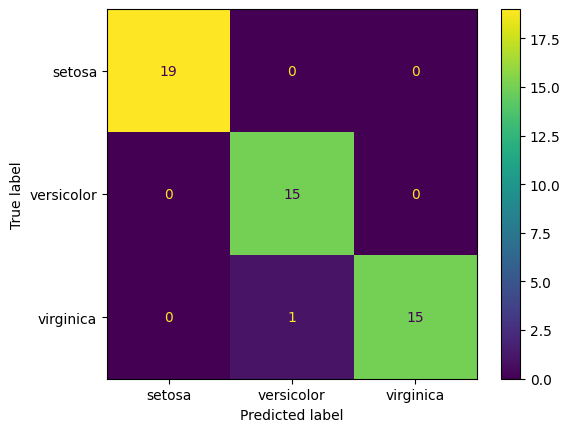

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, xtest,ytest)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")
scores

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [34]:
scores.mean()

np.float64(0.9319552669552669)

from above results it is confirmed that model is good f1_macro>0.8

###### Save the model for use in the web app

In [35]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [36]:
import joblib
joblib.dump(model,"model.joblib")

['model.joblib']

#### loading the model

In [37]:
m = joblib.load("model.joblib")

In [38]:
m

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

##### Out of sample prediction

In [40]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [46]:
def species_predict(sep_len, sep_wid, pet_len, pet_wid):
    d= [
        {
            "sepal_length":sep_len,
            "sepal_width": sep_wid,
            "petal_length": pet_len,
            "petal_width": pet_wid
        }
    ]
    xnew = pd.DataFrame(d)
    pred =model.predict(xnew)[0]
    probs=model.predict_proba(xnew)
    probs_dct = {}
    species = model.classes_
    for s,p in zip(species, probs.flatten()):
        probs_dct[s] = float(p)

    return pred,probs_dct


In [47]:
pred1, prob1 = species_predict(
    sep_len=6.3,
    sep_wid=2.5,
    pet_len=5.6,
    pet_wid=1.8
)






In [48]:
pred1

'virginica'

In [49]:
prob1

{'setosa': 0.00012948192997286513,
 'versicolor': 0.14328176845928056,
 'virginica': 0.8565887496107466}